In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO
import numpy as np

In [ ]:
# Input data as a string
data_str = """numdata;type;bubble;insertion;selection;shell;quick;merge;radix;heap
0;ord;9996.499400;0.314400;10672.714600;4.767900;0.323500;23.072900;6.784400;17.008500
0;inv;19973.159500;0.327500;10612.773200;5.286900;0.358600;21.080500;7.626800;17.011100
0;rdm;28368.647300;0.321100;11399.701000;5.042500;0.357600;22.009600;7.492100;16.699300
1;ord;50126.789000;0.691700;47323.615100;10.866300;0.747200;42.476400;16.444600;33.021500
1;inv;88502.534300;0.986900;48095.405700;13.492200;0.821100;52.626700;21.848300;36.207300
1;rdm;118254.074000;0.681700;44094.002900;11.569300;0.735100;46.975200;14.237000;34.693000
2;ord;93968.748300;0.942700;93954.355100;17.103000;1.010500;70.161900;24.686800;50.653200
2;inv;162808.377600;0.941900;95472.301100;16.729600;0.980700;64.789500;24.869600;48.823800
2;rdm;236983.221500;0.974200;93022.751300;17.034300;1.028900;66.321100;22.155800;50.234700
3;ord;253817.962500;1.588800;257011.541200;26.601600;2.177200;109.051300;40.645400;80.977400
3;inv;440066.810100;1.674600;253166.055000;43.936800;1.591900;138.583400;42.381300;84.817800
3;rdm;636959.794200;1.601300;255656.067300;27.072000;1.562300;108.829800;35.683700;84.048200
4;ord;989051.973700;4.316000;1021561.781200;61.786400;3.307500;222.734100;87.074900;170.780100
4;inv;1773611.251300;6.795700;1021550.983100;60.106600;3.187900;218.670900;82.139100;175.734900
4;rdm;2553059.659500;3.275800;1015638.169500;57.101900;3.127700;217.691000;70.192400;171.300400"""

# Read data into a DataFrame
data_df = pd.read_csv(StringIO(data_str), delimiter=';')

numdata = [100000, 200000, 300000, 500000, 1000000]

data_df["numdata"] = data_df["numdata"].map(dict(enumerate(numdata)))

In [ ]:
data_df

,numdata,type,bubble,insertion,selection,shell,quick,merge,radix,heap
0,100000,ord,9.996499e+03,0.3144,1.067271e+04,4.7679,0.3235,23.0729,6.7844,17.0085
1,100000,inv,1.997316e+04,0.3275,1.061277e+04,5.2869,0.3586,21.0805,7.6268,17.0111
2,100000,rdm,2.836865e+04,0.3211,1.139970e+04,5.0425,0.3576,22.0096,7.4921,16.6993
3,200000,ord,5.012679e+04,0.6917,4.732362e+04,10.8663,0.7472,42.4764,16.4446,33.0215
4,200000,inv,8.850253e+04,0.9869,4.809541e+04,13.4922,0.8211,52.6267,21.8483,36.2073
5,200000,rdm,1.182541e+05,0.6817,4.409400e+04,11.5693,0.7351,46.9752,14.2370,34.6930
6,300000,ord,9.396875e+04,0.9427,9.395436e+04,17.1030,1.0105,70.1619,24.6868,50.6532
7,300000,inv,1.628084e+05,0.9419,9.547230e+04,16.7296,0.9807,64.7895,24.8696,48.8238
8,300000,rdm,2.369832e+05,0.9742,9.302275e+04,17.0343,1.0289,66.3211,22.1558,50.2347
9,500000,ord,2.538180e+05,1.5888,2.570115e+05,26.6016,2.1772,109.0513,40.6454,80.9774


In [ ]:
# Filtra e agrupa os dados pelo tipo de algoritmo
bubble_data = data_df[["numdata",'type', 'bubble']]
insertion_data = data_df[["numdata",'type', 'insertion']]
selection_data = data_df[["numdata",'type', 'selection']]
shell_data = data_df[["numdata",'type', 'shell']]
quick_data = data_df[["numdata",'type', 'quick']]
merge_data = data_df[["numdata",'type', 'merge']]
radix_data = data_df[["numdata",'type', 'radix']]
heap_data = data_df[["numdata",'type', 'heap']]

In [ ]:
def thousands_formatter(x, pos):
    return f'{x / 1000:.0f}'

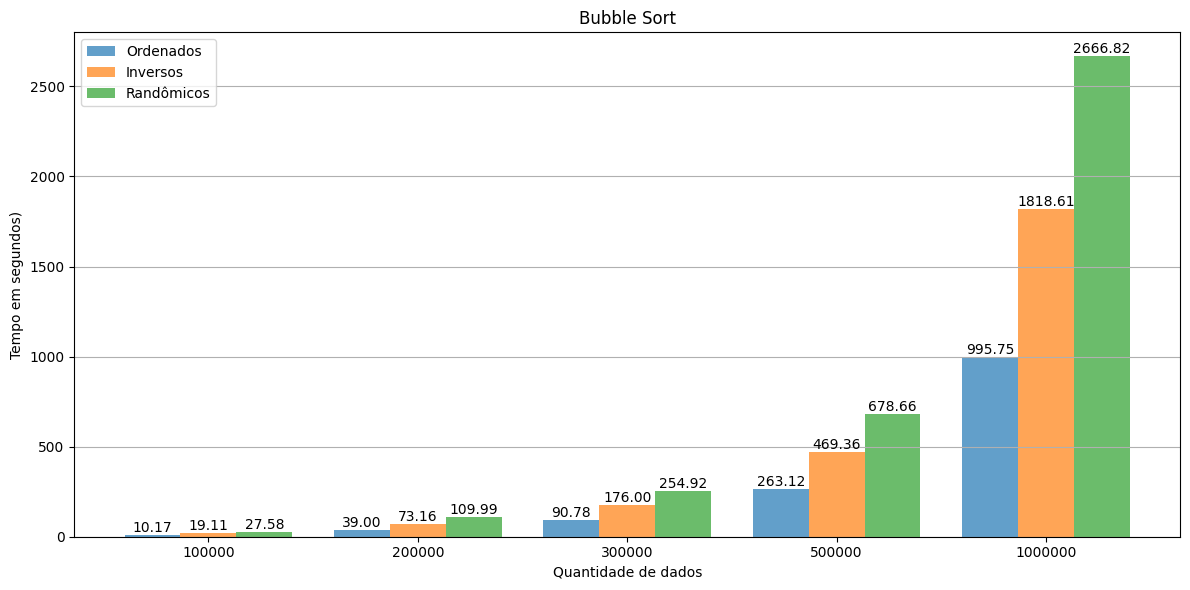

In [ ]:
# Filtra o dataframe por tipo de dados
ord_data = bubble_data[bubble_data["type"] == 'ord']
inv_data = bubble_data[bubble_data["type"] == 'inv']
rdm_data = bubble_data[bubble_data["type"] == 'rdm']

fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.4
group_spacing = 0.3

# Define o número de grupos. Cada grupo tem três colunas
num_groups = len(ord_data)
# Cria um array de x posições para os grupos
x_positions = np.arange(num_groups) * (3 * bar_width + group_spacing)

ax.bar(x_positions, ord_data['bubble'], width=bar_width, label='Ordenados', align='center', alpha=0.7)
ax.bar(x_positions + bar_width, inv_data['bubble'], width=bar_width, label='Inversos', align='center', alpha=0.7)
ax.bar(x_positions + 2 * bar_width, rdm_data['bubble'], width=bar_width, label='Randômicos', align='center', alpha=0.7)

ax.set_xlabel('Quantidade de dados')
ax.set_ylabel('Tempo em segundos)')
ax.set_title('Bubble Sort')

for x, y in zip(x_positions, ord_data['bubble']):
    ax.text(x, y, f'{y / 1000:.2f}', ha='center', va='bottom')

for x, y in zip(x_positions + bar_width, inv_data['bubble']):
    ax.text(x, y, f'{y / 1000:.2f}', ha='center', va='bottom')

for x, y in zip(x_positions + 2 * bar_width, rdm_data['bubble']):
    ax.text(x, y, f'{y / 1000:.2f}', ha='center', va='bottom')

ax.set_xticks(x_positions + bar_width)
ax.set_xticklabels(bubble_data["numdata"].unique())  # Set custom x-axis labels

# Use the custom tick formatter for the y-axis
ax.yaxis.set_major_formatter(thousands_formatter)

ax.legend()
ax.grid(axis='y')

plt.tight_layout()
plt.show()

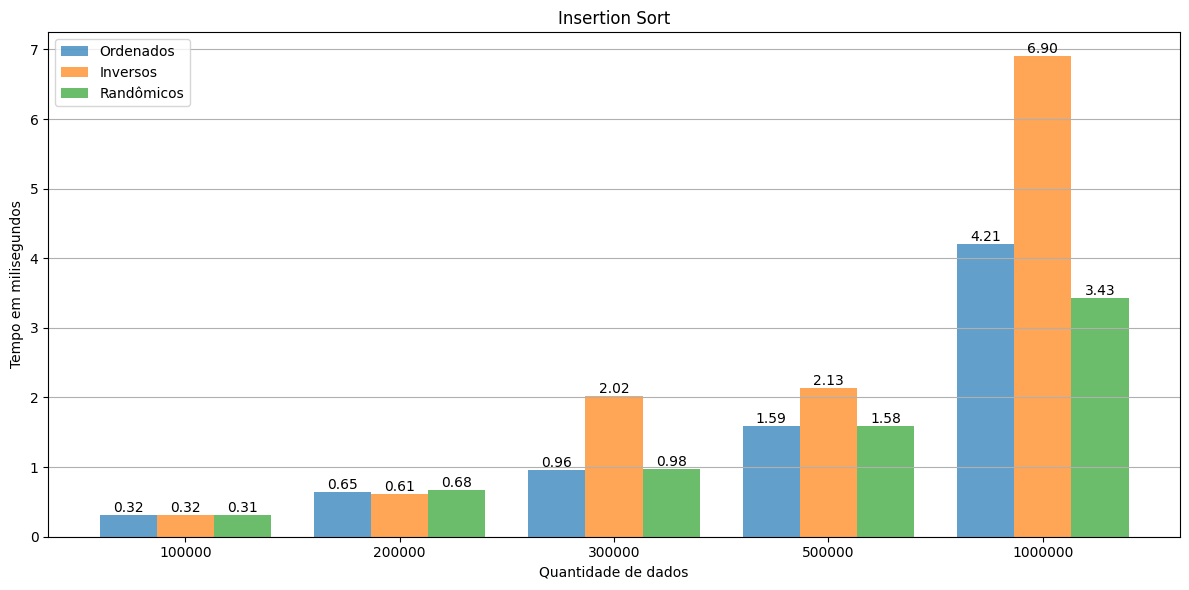

In [ ]:
# Filtra o dataframe por tipo de dados
ord_data = insertion_data[insertion_data["type"] == 'ord']
inv_data = insertion_data[insertion_data["type"] == 'inv']
rdm_data = insertion_data[insertion_data["type"] == 'rdm']

plt.figure(figsize=(12, 6))

bar_width = 0.4
group_spacing = 0.3

# Define o número de grupos. Cada grupo tem três colunas
num_groups = len(ord_data)
# Cria um array de x posições para os grupos
x_positions = np.arange(num_groups) * (3 * bar_width + group_spacing)

plt.bar(x_positions, ord_data['insertion'], width=bar_width, label='Ordenados', align='center', alpha=0.7)
plt.bar(x_positions + bar_width, inv_data['insertion'], width=bar_width, label='Inversos', align='center', alpha=0.7)
plt.bar(x_positions + 2 * bar_width, rdm_data['insertion'], width=bar_width, label='Randômicos', align='center', alpha=0.7)

plt.xlabel('Quantidade de dados')
plt.ylabel('Tempo em milisegundos')
plt.title('Insertion Sort')

for x, y in zip(x_positions, ord_data['insertion']):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

for x, y in zip(x_positions + bar_width, inv_data['insertion']):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

for x, y in zip(x_positions + 2 * bar_width, rdm_data['insertion']):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.xticks(x_positions + bar_width, insertion_data["numdata"].unique())  # posiciona e nomeia as infos das colunas

plt.legend()
plt.grid(axis='y')

plt.tight_layout()
plt.show()

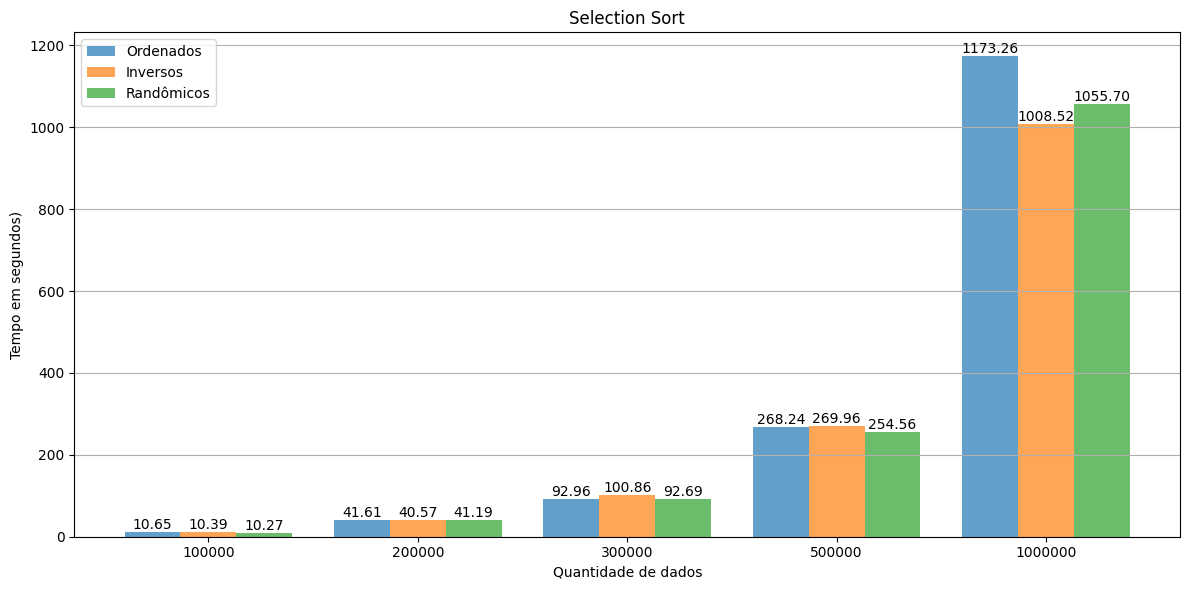

In [ ]:
# Filtra o dataframe por tipo de dados
ord_data = selection_data[selection_data["type"] == 'ord']
inv_data = selection_data[selection_data["type"] == 'inv']
rdm_data = selection_data[selection_data["type"] == 'rdm']

fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.4
group_spacing = 0.3

# Define o número de grupos. Cada grupo tem três colunas
num_groups = len(ord_data)
# Cria um array de x posições para os grupos
x_positions = np.arange(num_groups) * (3 * bar_width + group_spacing)

ax.bar(x_positions, ord_data['selection'], width=bar_width, label='Ordenados', align='center', alpha=0.7)
ax.bar(x_positions + bar_width, inv_data['selection'], width=bar_width, label='Inversos', align='center', alpha=0.7)
ax.bar(x_positions + 2 * bar_width, rdm_data['selection'], width=bar_width, label='Randômicos', align='center', alpha=0.7)

ax.set_xlabel('Quantidade de dados')
ax.set_ylabel('Tempo em segundos)')
ax.set_title('Selection Sort')

for x, y in zip(x_positions, ord_data['selection']):
    ax.text(x, y, f'{y / 1000:.2f}', ha='center', va='bottom')

for x, y in zip(x_positions + bar_width, inv_data['selection']):
    ax.text(x, y, f'{y / 1000:.2f}', ha='center', va='bottom')

for x, y in zip(x_positions + 2 * bar_width, rdm_data['selection']):
    ax.text(x, y, f'{y / 1000:.2f}', ha='center', va='bottom')

ax.set_xticks(x_positions + bar_width)
ax.set_xticklabels(selection_data["numdata"].unique())  # Set custom x-axis labels

# Use the custom tick formatter for the y-axis
ax.yaxis.set_major_formatter(thousands_formatter)

ax.legend()
ax.grid(axis='y')

plt.tight_layout()
plt.show()

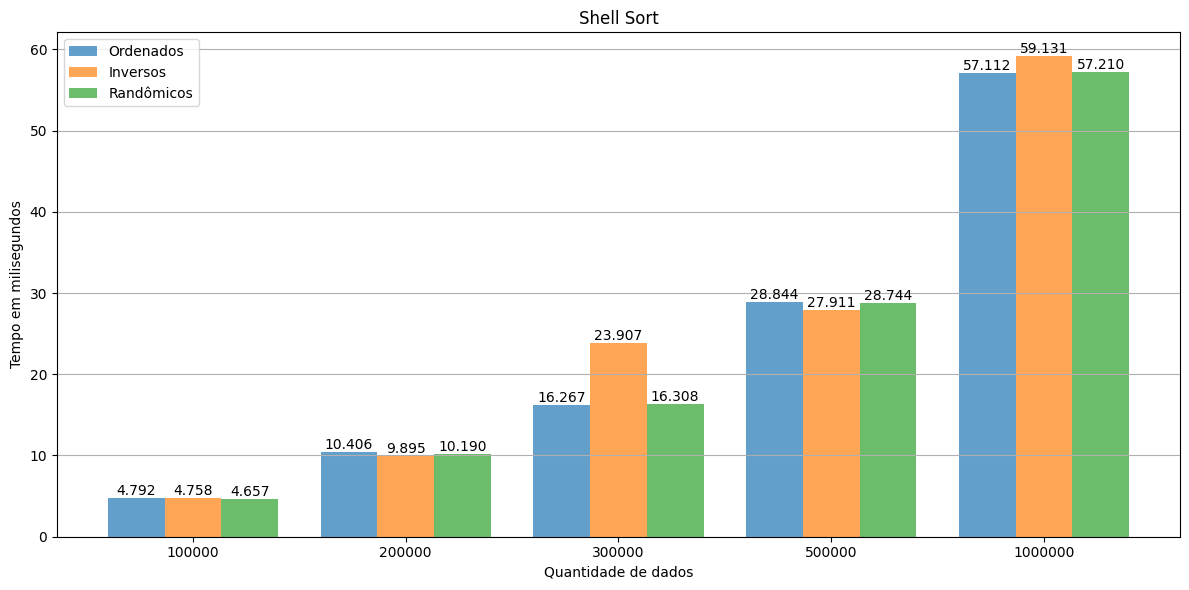

In [ ]:
# Filtra o dataframe por tipo de dados
ord_data = shell_data[shell_data["type"] == 'ord']
inv_data = shell_data[shell_data["type"] == 'inv']
rdm_data = shell_data[shell_data["type"] == 'rdm']

plt.figure(figsize=(12, 6))

bar_width = 0.4
group_spacing = 0.3

# Define o número de grupos. Cada grupo tem três colunas
num_groups = len(ord_data)
# Cria um array de x posições para os grupos
x_positions = np.arange(num_groups) * (3 * bar_width + group_spacing)

plt.bar(x_positions, ord_data['shell'], width=bar_width, label='Ordenados', align='center', alpha=0.7)
plt.bar(x_positions + bar_width, inv_data['shell'], width=bar_width, label='Inversos', align='center', alpha=0.7)
plt.bar(x_positions + 2 * bar_width, rdm_data['shell'], width=bar_width, label='Randômicos', align='center', alpha=0.7)

plt.xlabel('Quantidade de dados')
plt.ylabel('Tempo em milisegundos')
plt.title('Shell Sort')

for x, y in zip(x_positions, ord_data['shell']):
    plt.text(x, y, f'{y:.3f}', ha='center', va='bottom')

for x, y in zip(x_positions + bar_width, inv_data['shell']):
    plt.text(x, y, f'{y:.3f}', ha='center', va='bottom')

for x, y in zip(x_positions + 2 * bar_width, rdm_data['shell']):
    plt.text(x, y, f'{y:.3f}', ha='center', va='bottom')

plt.xticks(x_positions + bar_width, shell_data["numdata"].unique())  # posiciona e nomeia as infos das colunas

plt.legend()
plt.grid(axis='y')

plt.tight_layout()
plt.show()

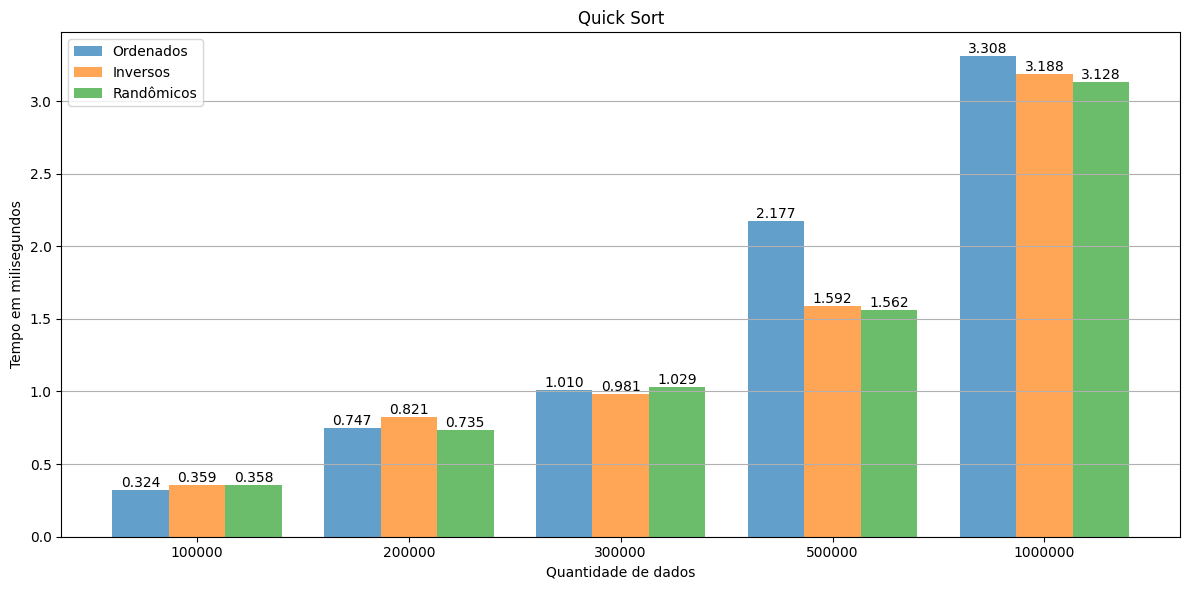

In [ ]:
# Filtra o dataframe por tipo de dados
ord_data = quick_data[quick_data["type"] == 'ord']
inv_data = quick_data[quick_data["type"] == 'inv']
rdm_data = quick_data[quick_data["type"] == 'rdm']

plt.figure(figsize=(12, 6))

bar_width = 0.4
group_spacing = 0.3

# Define o número de grupos. Cada grupo tem três colunas
num_groups = len(ord_data)
# Cria um array de x posições para os grupos
x_positions = np.arange(num_groups) * (3 * bar_width + group_spacing)

plt.bar(x_positions, ord_data['quick'], width=bar_width, label='Ordenados', align='center', alpha=0.7)
plt.bar(x_positions + bar_width, inv_data['quick'], width=bar_width, label='Inversos', align='center', alpha=0.7)
plt.bar(x_positions + 2 * bar_width, rdm_data['quick'], width=bar_width, label='Randômicos', align='center', alpha=0.7)

plt.xlabel('Quantidade de dados')
plt.ylabel('Tempo em milisegundos')
plt.title('Quick Sort')

for x, y in zip(x_positions, ord_data['quick']):
    plt.text(x, y, f'{y:.3f}', ha='center', va='bottom')

for x, y in zip(x_positions + bar_width, inv_data['quick']):
    plt.text(x, y, f'{y:.3f}', ha='center', va='bottom')

for x, y in zip(x_positions + 2 * bar_width, rdm_data['quick']):
    plt.text(x, y, f'{y:.3f}', ha='center', va='bottom')

plt.xticks(x_positions + bar_width, quick_data["numdata"].unique())  # posiciona e nomeia as infos das colunas

plt.legend()
plt.grid(axis='y')

plt.tight_layout()
plt.show()

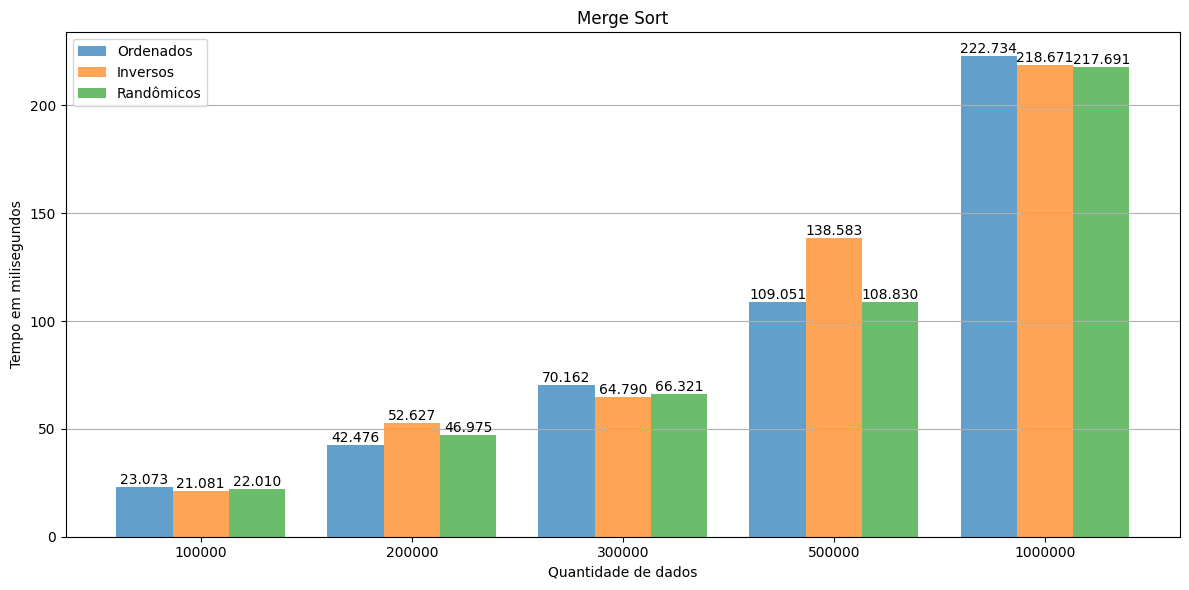

In [ ]:
# Filtra o dataframe por tipo de dados
ord_data = merge_data[merge_data["type"] == 'ord']
inv_data = merge_data[merge_data["type"] == 'inv']
rdm_data = merge_data[merge_data["type"] == 'rdm']

plt.figure(figsize=(12, 6))

bar_width = 0.4
group_spacing = 0.3

# Define o número de grupos. Cada grupo tem três colunas
num_groups = len(ord_data)
# Cria um array de x posições para os grupos
x_positions = np.arange(num_groups) * (3 * bar_width + group_spacing)

plt.bar(x_positions, ord_data['merge'], width=bar_width, label='Ordenados', align='center', alpha=0.7)
plt.bar(x_positions + bar_width, inv_data['merge'], width=bar_width, label='Inversos', align='center', alpha=0.7)
plt.bar(x_positions + 2 * bar_width, rdm_data['merge'], width=bar_width, label='Randômicos', align='center', alpha=0.7)

plt.xlabel('Quantidade de dados')
plt.ylabel('Tempo em milisegundos')
plt.title('Merge Sort')

for x, y in zip(x_positions, ord_data['merge']):
    plt.text(x, y, f'{y:.3f}', ha='center', va='bottom')

for x, y in zip(x_positions + bar_width, inv_data['merge']):
    plt.text(x, y, f'{y:.3f}', ha='center', va='bottom')

for x, y in zip(x_positions + 2 * bar_width, rdm_data['merge']):
    plt.text(x, y, f'{y:.3f}', ha='center', va='bottom')

plt.xticks(x_positions + bar_width, merge_data["numdata"].unique())  # posiciona e nomeia as infos das colunas

plt.legend()
plt.grid(axis='y')

plt.tight_layout()
plt.show()

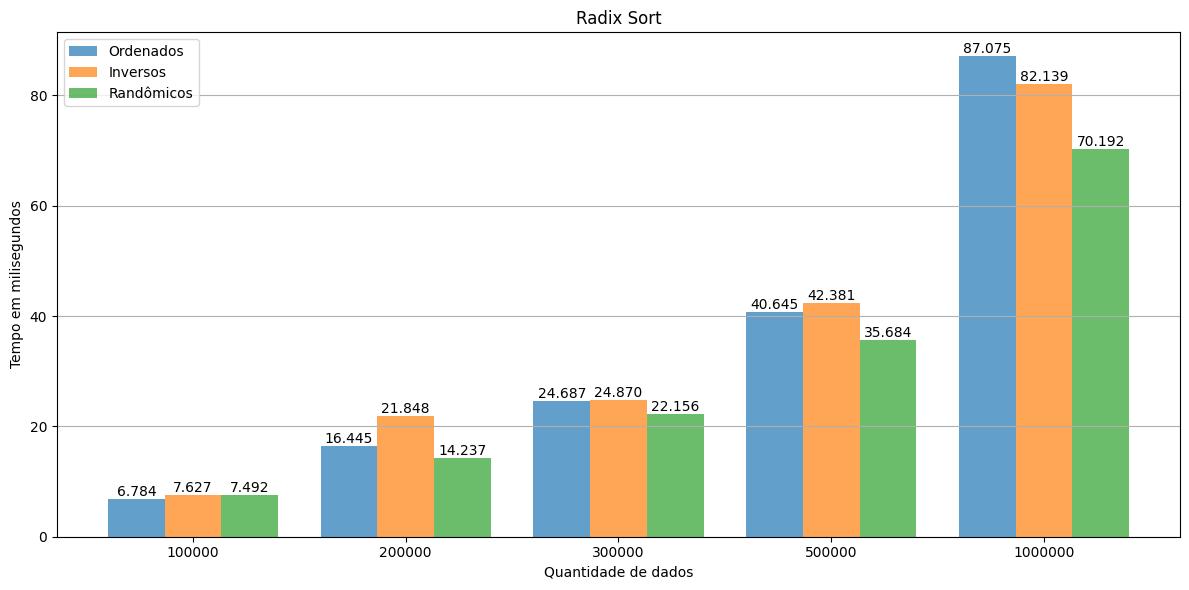

In [ ]:
# Filtra o dataframe por tipo de dados
ord_data = radix_data[radix_data["type"] == 'ord']
inv_data = radix_data[radix_data["type"] == 'inv']
rdm_data = radix_data[radix_data["type"] == 'rdm']

plt.figure(figsize=(12, 6))

bar_width = 0.4
group_spacing = 0.3

# Define o número de grupos. Cada grupo tem três colunas
num_groups = len(ord_data)
# Cria um array de x posições para os grupos
x_positions = np.arange(num_groups) * (3 * bar_width + group_spacing)

plt.bar(x_positions, ord_data['radix'], width=bar_width, label='Ordenados', align='center', alpha=0.7)
plt.bar(x_positions + bar_width, inv_data['radix'], width=bar_width, label='Inversos', align='center', alpha=0.7)
plt.bar(x_positions + 2 * bar_width, rdm_data['radix'], width=bar_width, label='Randômicos', align='center', alpha=0.7)

plt.xlabel('Quantidade de dados')
plt.ylabel('Tempo em milisegundos')
plt.title('Radix Sort')

for x, y in zip(x_positions, ord_data['radix']):
    plt.text(x, y, f'{y:.3f}', ha='center', va='bottom')

for x, y in zip(x_positions + bar_width, inv_data['radix']):
    plt.text(x, y, f'{y:.3f}', ha='center', va='bottom')

for x, y in zip(x_positions + 2 * bar_width, rdm_data['radix']):
    plt.text(x, y, f'{y:.3f}', ha='center', va='bottom')

plt.xticks(x_positions + bar_width, radix_data["numdata"].unique())  # posiciona e nomeia as infos das colunas

plt.legend()
plt.grid(axis='y')

plt.tight_layout()
plt.show()

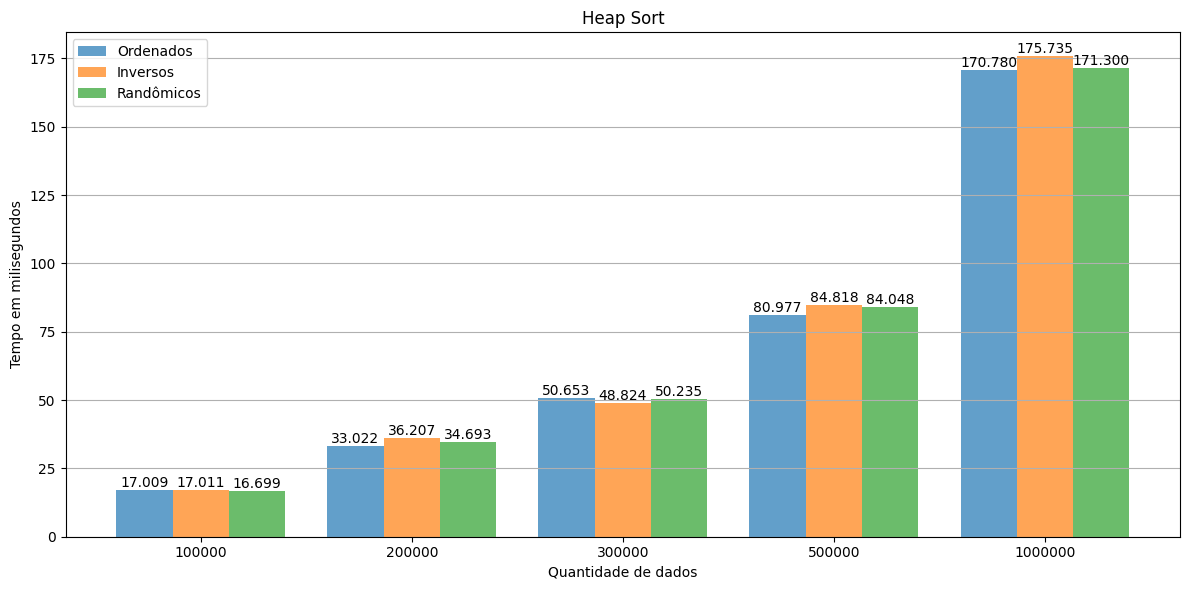

In [ ]:
# Filtra o dataframe por tipo de dados
ord_data = heap_data[heap_data["type"] == 'ord']
inv_data = heap_data[heap_data["type"] == 'inv']
rdm_data = heap_data[heap_data["type"] == 'rdm']

plt.figure(figsize=(12, 6))

bar_width = 0.4
group_spacing = 0.3

# Define o número de grupos. Cada grupo tem três colunas
num_groups = len(ord_data)
# Cria um array de x posições para os grupos
x_positions = np.arange(num_groups) * (3 * bar_width + group_spacing)

plt.bar(x_positions, ord_data['heap'], width=bar_width, label='Ordenados', align='center', alpha=0.7)
plt.bar(x_positions + bar_width, inv_data['heap'], width=bar_width, label='Inversos', align='center', alpha=0.7)
plt.bar(x_positions + 2 * bar_width, rdm_data['heap'], width=bar_width, label='Randômicos', align='center', alpha=0.7)

plt.xlabel('Quantidade de dados')
plt.ylabel('Tempo em milisegundos')
plt.title('Heap Sort')

for x, y in zip(x_positions, ord_data['heap']):
    plt.text(x, y, f'{y:.3f}', ha='center', va='bottom')

for x, y in zip(x_positions + bar_width, inv_data['heap']):
    plt.text(x, y, f'{y:.3f}', ha='center', va='bottom')

for x, y in zip(x_positions + 2 * bar_width, rdm_data['heap']):
    plt.text(x, y, f'{y:.3f}', ha='center', va='bottom')

plt.xticks(x_positions + bar_width, heap_data["numdata"].unique())  # posiciona e nomeia as infos das colunas

plt.legend()
plt.grid(axis='y')

plt.tight_layout()
plt.show()